/home/ardie85/PHD/Research/code/.venv/lib/python3.10/site-packages/gym/wrappers/monitoring/video_recorder.py:9: DeprecationWarning: The distutils package is deprecated and slated for removal in Python 3.12. Use setuptools or check PEP 632 for potential alternatives
  import distutils.spawn
2024-04-22 21:24:53.844019: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-22 21:24:53.876629: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-22 21:24:54.424093: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT War

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 21       |
|    ep_rew_mean     | 21       |
| time/              |          |
|    fps             | 1254     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 28.1        |
|    ep_rew_mean          | 28.1        |
| time/                   |             |
|    fps                  | 1084        |
|    iterations           | 2           |
|    time_elapsed         | 3           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.009250887 |
|    clip_fraction        | 0.123       |
|    clip_range           | 0.2         |
|    entropy_loss  

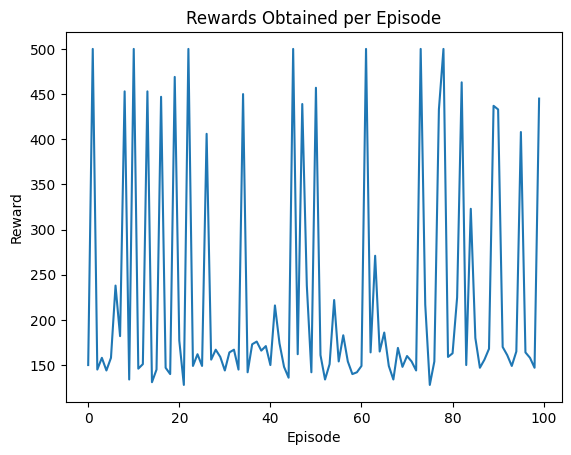

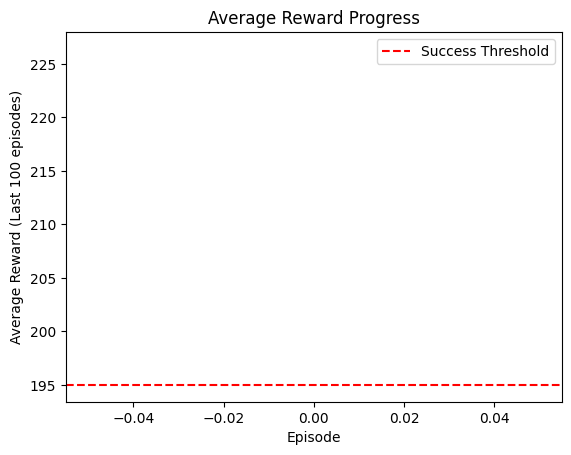

CartPole challenge solved after 100 episodes with an average reward of 226.41 over the last 100 episodes.


In [1]:
import gymnasium as gym
from stable_baselines3 import PPO
import matplotlib.pyplot as plt
import numpy as np

env = gym.make("FrozenLake-v1", render_mode="none")

model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=10_000)

vec_env = model.get_env()
obs = vec_env.reset()

success_count = 0
episode_rewards = []
num_episodes = 1000
success_threshold = 195.0
consecutive_trials = 100

avg_rewards = []
success = False

for i in range(num_episodes):
    episode_reward = 0
    success = False

    while True:
        action, _states = model.predict(obs, deterministic=True)
        obs, reward, done, info = vec_env.step(action)
        episode_reward += reward

        if done:
            success = reward == 1
            if success:
                success_count += 1
            break

    episode_rewards.append(episode_reward)
    print("Episode: {}, Reward: {}, Success: {}".format(i, episode_reward, success))

    # Calculate average reward over the last 100 episodes
    if len(episode_rewards) >= consecutive_trials:
        avg_reward = np.mean(episode_rewards[-consecutive_trials:])
        avg_rewards.append(avg_reward)
        print("Average Reward over last 100 episodes: {:.2f}".format(avg_reward))

        # Check if challenge is solved
        if avg_reward >= success_threshold:
            success = True
            break

# Plotting
plt.plot(episode_rewards)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Rewards Obtained per Episode')
plt.show()

plt.plot(avg_rewards)
plt.xlabel('Episode')
plt.ylabel('Average Reward (Last 100 episodes)')
plt.title('Average Reward Progress')
plt.axhline(y=success_threshold, color='r', linestyle='--', label='Success Threshold')
plt.legend()
plt.show()

if success:
    print("CartPole challenge solved after {} episodes with an average reward of {:.2f} over the last 100 episodes.".format(i + 1, avg_reward))
else:
    print("Failed to solve the CartPole challenge.")
    
env.close()
